In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
data_dir = "/Users/maxverbiest/PhD/projects/genotype_strs/data/fotsing_data/"
df = pd.read_csv(data_dir + "fotsing_etal_data_sheet_hg38_tral_panel.tsv", header = None, sep="\t")
df['tmp_id'] = df.apply(lambda row: f"{row[12]}_{row[13]}", axis = 1)
df.drop([12, 13, 14, 15, 17, 18], axis=1, inplace=True)
df.columns = [
  "chr",
  "start",
  "end",
  "gene_id",
  "gene_name",
  "tissue_hits",
  "beta_max",
  "tissue_info",
  "pval",
  "CAVIAR_score",
  "unit_fw",
  "unit_rv",
  "unit_panel",
  "panel_overlap",
  "tmp_id"
]

In [8]:
df.to_csv(f"{data_dir}fotsing_etal_tmp_id_mapping.tsv", sep="\t", index=False)

In [6]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22393 entries, 0 to 22392
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   chr            22393 non-null  object 
 1   start          22393 non-null  int64  
 2   end            22393 non-null  int64  
 3   gene_id        22393 non-null  object 
 4   gene_name      22393 non-null  object 
 5   tissue_hits    22393 non-null  int64  
 6   beta_max       22393 non-null  float64
 7   tissue_info    22393 non-null  object 
 8   pval           22393 non-null  float64
 9   CAVIAR_score   22347 non-null  float64
 10  unit_fw        22393 non-null  object 
 11  unit_rv        22393 non-null  object 
 12  unit_panel     22393 non-null  object 
 13  panel_overlap  22393 non-null  int64  
 14  tmp_id         22393 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 2.6+ MB
None


,start,end,tissue_hits,beta_max,pval,CAVIAR_score,panel_overlap
count,2.239300e+04,2.239300e+04,22393.000000,22393.000000,2.239300e+04,2.234700e+04,22393.000000
mean,7.453439e+07,7.453442e+07,1.981155,0.004186,3.152115e-04,7.148528e-02,19.111017
std,5.566473e+07,5.566473e+07,2.146705,0.319096,6.417859e-04,1.365815e-01,10.788728
min,4.949300e+04,4.950400e+04,1.000000,-0.842330,1.020000e-69,7.950000e-16,1.000000
25%,3.262554e+07,3.262557e+07,1.000000,-0.271403,2.630000e-07,9.636540e-03,11.000000
50%,6.058528e+07,6.058533e+07,1.000000,0.180656,4.800000e-05,2.422930e-02,15.000000
75%,1.095858e+08,1.095858e+08,2.000000,0.273124,3.961950e-04,6.501635e-02,24.000000
max,2.489043e+08,2.489043e+08,17.000000,0.814063,2.584264e-02,1.000000e+00,91.000000


In [7]:
df.head()

,chr,start,end,gene_id,gene_name,tissue_hits,beta_max,tissue_info,pval,CAVIAR_score,unit_fw,unit_rv,unit_panel,panel_overlap,tmp_id
0,chr1,950660,950671,ENSG00000187583,PLEKHN1,2,-0.226886,Cells-Transformedfibroblasts_-0.22_0.01;Nerve-...,2.068940e-04,0.040808,AC,GT,CA,11,chr1_950660
1,chr1,950660,950671,ENSG00000187961,KLHL17,1,-0.195615,Esophagus-Mucosa_-0.20_0.01,1.733056e-03,0.010497,AC,GT,CA,11,chr1_950660
2,chr1,950660,950671,ENSG00000188976,NOC2L,5,0.312156,Artery-Tibial_0.19_0.01;Lung_0.20_0.07;Nerve-T...,4.350000e-08,0.103870,AC,GT,CA,11,chr1_950660
3,chr1,965304,965346,ENSG00000187642,C1orf170,1,-0.252924,Esophagus-Muscularis_-0.25_0.01,1.911650e-04,0.012421,ATTT,AAAT,TTTA,11,chr1_965316
4,chr1,1002183,1002202,ENSG00000187608,ISG15,2,0.208372,Artery-Tibial_0.21_0.05;Nerve-Tibial_0.19_0.08,6.725450e-04,0.082017,T,A,T,19,chr1_1002183


In [28]:
def get_consensus_unit(unit: str) -> str:
    """ Determine all circular permutations of input unit, sort alphabetically and return the 
    first permutation. e.g. TTTA -> ['TTTA', 'TTAT', 'TATT', 'ATTT'] -> ATTT
    """
    unit2 = unit + unit
    permutations = []

    for i in range(0, len(unit)):
         permutations.append( unit2[i : i+len(unit)] )
            
    return sorted(permutations)[0]

In [29]:
df.loc[:, 'unit_panel'] = df.apply(lambda row: get_consensus_unit(row.unit_panel), axis=1)

In [23]:
df.head()

,chr,start,end,gene_id,gene_name,tissue_hits,beta_max,tissue_info,pval,CAVIAR_score,unit_fw,unit_rv,unit_panel,panel_overlap,tmp_id
0,chr1,950660,950671,ENSG00000187961,KLHL17,1,-0.195615,Esophagus-Mucosa_-0.20_0.01,1.733056e-03,0.010497,AC,GT,AC,11,chr1_950660
1,chr1,950660,950671,ENSG00000188976,NOC2L,5,0.312156,Artery-Tibial_0.19_0.01;Lung_0.20_0.07;Nerve-T...,4.350000e-08,0.103870,AC,GT,AC,11,chr1_950660
2,chr1,965304,965346,ENSG00000187642,C1orf170,1,-0.252924,Esophagus-Muscularis_-0.25_0.01,1.911650e-04,0.012421,ATTT,AAAT,ATTT,11,chr1_965316
3,chr1,1002183,1002202,ENSG00000187608,ISG15,2,0.208372,Artery-Tibial_0.21_0.05;Nerve-Tibial_0.19_0.08,6.725450e-04,0.082017,T,A,T,19,chr1_1002183
4,chr1,1002183,1002202,ENSG00000187642,C1orf170,2,0.323700,Esophagus-Mucosa_0.32_0.00;Lung_-0.22_0.04,1.970000e-07,0.042521,T,A,T,19,chr1_1002183


In [24]:
df.shape

(22346, 15)

In [25]:
df_matched = df.loc[((df.unit_fw == df.unit_panel) | (df.unit_rv == df.unit_panel))]
df_matched.shape

(20892, 15)

In [26]:
df_mismatched = df.loc[((df.unit_fw != df.unit_panel) & (df.unit_rv != df.unit_panel))]
print(df_mismatched.shape)
df_mismatched.head()

(1454, 15)


,chr,start,end,gene_id,gene_name,tissue_hits,beta_max,tissue_info,pval,CAVIAR_score,unit_fw,unit_rv,unit_panel,panel_overlap,tmp_id
17,chr1,1388566,1388619,ENSG00000127054,CPSF3L,2,0.233279,Skin-NotSunExposed_0.23_0.01;Skin-SunExposed_0...,1.163234e-03,0.010326,CT,AG,AT,17,chr1_1388584
18,chr1,1388566,1388619,ENSG00000127054,CPSF3L,2,0.233279,Skin-NotSunExposed_0.23_0.01;Skin-SunExposed_0...,1.163234e-03,0.010326,CT,AG,AC,15,chr1_1388604
20,chr1,1388566,1388619,ENSG00000131584,ACAP3,3,-0.292519,Adipose-Subcutaneous_-0.24_0.41;Artery-Aorta_-...,2.310000e-06,0.835290,CT,AG,AT,17,chr1_1388584
21,chr1,1388566,1388619,ENSG00000131584,ACAP3,3,-0.292519,Adipose-Subcutaneous_-0.24_0.41;Artery-Aorta_-...,2.310000e-06,0.835290,CT,AG,AC,15,chr1_1388604
23,chr1,1388566,1388619,ENSG00000160072,ATAD3B,8,-0.344710,Adipose-Subcutaneous_-0.26_0.63;Adipose-Viscer...,1.930000e-08,0.997965,CT,AG,AT,17,chr1_1388584


In [31]:
df.loc[df.start == 1388566]

,chr,start,end,gene_id,gene_name,tissue_hits,beta_max,tissue_info,pval,CAVIAR_score,unit_fw,unit_rv,unit_panel,panel_overlap,tmp_id
16,chr1,1388566,1388619,ENSG00000127054,CPSF3L,2,0.233279,Skin-NotSunExposed_0.23_0.01;Skin-SunExposed_0...,1.163234e-03,0.010326,CT,AG,CT,17,chr1_1388567
17,chr1,1388566,1388619,ENSG00000127054,CPSF3L,2,0.233279,Skin-NotSunExposed_0.23_0.01;Skin-SunExposed_0...,1.163234e-03,0.010326,CT,AG,AT,17,chr1_1388584
18,chr1,1388566,1388619,ENSG00000127054,CPSF3L,2,0.233279,Skin-NotSunExposed_0.23_0.01;Skin-SunExposed_0...,1.163234e-03,0.010326,CT,AG,AC,15,chr1_1388604
19,chr1,1388566,1388619,ENSG00000131584,ACAP3,3,-0.292519,Adipose-Subcutaneous_-0.24_0.41;Artery-Aorta_-...,2.310000e-06,0.835290,CT,AG,CT,17,chr1_1388567
20,chr1,1388566,1388619,ENSG00000131584,ACAP3,3,-0.292519,Adipose-Subcutaneous_-0.24_0.41;Artery-Aorta_-...,2.310000e-06,0.835290,CT,AG,AT,17,chr1_1388584
21,chr1,1388566,1388619,ENSG00000131584,ACAP3,3,-0.292519,Adipose-Subcutaneous_-0.24_0.41;Artery-Aorta_-...,2.310000e-06,0.835290,CT,AG,AC,15,chr1_1388604
22,chr1,1388566,1388619,ENSG00000160072,ATAD3B,8,-0.344710,Adipose-Subcutaneous_-0.26_0.63;Adipose-Viscer...,1.930000e-08,0.997965,CT,AG,CT,17,chr1_1388567
23,chr1,1388566,1388619,ENSG00000160072,ATAD3B,8,-0.344710,Adipose-Subcutaneous_-0.26_0.63;Adipose-Viscer...,1.930000e-08,0.997965,CT,AG,AT,17,chr1_1388584
24,chr1,1388566,1388619,ENSG00000160072,ATAD3B,8,-0.344710,Adipose-Subcutaneous_-0.26_0.63;Adipose-Viscer...,1.930000e-08,0.997965,CT,AG,AC,15,chr1_1388604
25,chr1,1388566,1388619,ENSG00000169972,PUSL1,1,-0.201401,Thyroid_-0.20_0.05,1.530539e-03,0.046424,CT,AG,CT,17,chr1_1388567


In [106]:
df_grouped = []
for name, group in df.groupby(['chr', 'start', 'gene_name']):
    new_df_row = dict(group.reset_index().loc[0, 'chr':'unit_rv'])
    new_df_row['unit_panel'] = list(group.unit_panel)
    new_df_row['panel_overlap'] = np.sum(group.panel_overlap)
    new_df_row['tmp_id'] = list(group.tmp_id)
    df_grouped.append(new_df_row)

df_grouped = pd.DataFrame(df_grouped)

In [115]:
df_grouped['unit_fw'].head()

0      AC
1      AC
2    ATTT
3       T
4       T
Name: unit_fw, dtype: object

In [138]:
def check_unit_match(row) -> bool:
#     if not all([len(pu) == len(row.unit_fw) for pu in row.unit_panel]):
#         return False
    if any([pu == row.unit_fw for pu in row.unit_panel]):
        return True
    if any([pu == row.unit_rv for pu in row.unit_panel]):
        return True
    return False

In [162]:
df_grouped_filt = df_grouped[df_grouped.apply(lambda row: check_unit_match(row), axis=1)]

In [130]:
df.loc[df.gene_name == "KCNAB2", :]

,chr,start,end,gene_id,gene_name,tissue_hits,beta_max,tissue_info,pval,CAVIAR_score,unit_fw,unit_rv,unit_panel,panel_overlap,tmp_id
88,chr1,6030449,6030473,ENSG00000069424,KCNAB2,1,0.258883,WholeBlood_0.26_0.06,0.000003,0.059147,GT,AC,GT,19,chr1_6030449
90,chr1,6033229,6033283,ENSG00000069424,KCNAB2,1,-0.303323,Esophagus-Muscularis_-0.30_0.07,0.000008,0.071260,GTGTGT,ACACAC,GT,11,chr1_6033252


In [140]:
# df_grouped.apply(lambda row: check_unit_match(row), axis=1)
check_idx = df_grouped.apply(lambda row: check_unit_match(row), axis=1)
np.unique(check_idx, return_counts=True)

(array([False,  True]), array([  232, 19792]))

In [161]:
df_grouped[check_idx].shape
# df_grouped[~check_idx].shape

(19792, 16)

16832

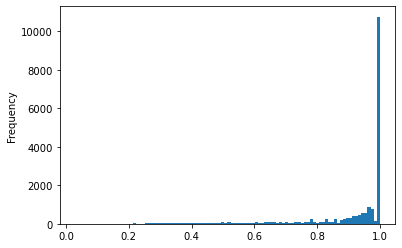

In [155]:
df_grouped['coverage'] = df_grouped.apply(lambda row: min(1, row.panel_overlap / (row.end - row.start)), axis=1)
df_grouped.coverage.plot(kind='hist', bins=100)
len(df_grouped[df_grouped.coverage > 0.8])

15847

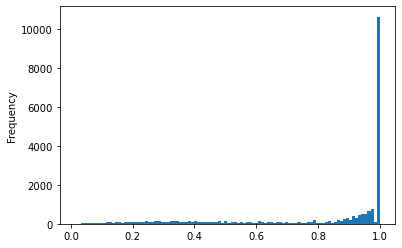

In [156]:
df['coverage'] = df.apply(lambda row: row.panel_overlap / (row.end - row.start), axis=1)
df.coverage.plot(kind='hist', bins=100)
len(df[df.coverage > 0.8])

In [157]:
df.loc[:, ['chr', 'start', 'gene_name', 'tmp_id']]

,chr,start,gene_name,tmp_id
0,chr1,950660,KLHL17,chr1_950660
1,chr1,950660,NOC2L,chr1_950660
2,chr1,965304,C1orf170,chr1_965316
3,chr1,1002183,ISG15,chr1_1002183
4,chr1,1002183,C1orf170,chr1_1002183
...,...,...,...,...
22341,chr22,50632678,MAPK8IP2,chr22_50632683
22342,chr22,50632678,CHKB,chr22_50632683
22343,chr22,50632678,ARSA,chr22_50632683
22344,chr22,50632678,CPT1B,chr22_50632683
